# Aplicación de Clasificación

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene la generación de un modelo predictivo para una variable discreta, es decir, un modelo de clasificación.

Se presentan las métricas asociadas a los modelos de clasificación.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````




# CONTEXTO

**Diabetes**, es un grupo de trastornos metabólicos en los que hay niveles elevados de azúcar en la sangre durante un período prolongado. Los síntomas de niveles altos de azúcar en la sangre incluyen micción frecuente, aumento de la sed y aumento del hambre. Si no se trata, la diabetes puede causar muchas complicaciones. Las complicaciones agudas pueden incluir cetoacidosis diabética, estado hiperglucémico hiperosmolar o muerte. Las complicaciones graves a largo plazo incluyen enfermedad cardiovascular, accidente cerebrovascular, enfermedad renal crónica, úlceras en los pies y daños en los ojos.
.

Este **dataset** es originario del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de manera diagnóstica si un paciente tiene o no diabetes, en función de ciertas medidas de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de herencia indígena pima.

## Objetivo

Construiremos un modelo de aprendizaje automático para predecir con precisión si los pacientes en el conjunto de datos tienen diabetes o no.

## Data


Los conjuntos de datos consisten en varias variables predictoras médicas y una variable objetivo, Resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)




In [25]:
!pip install plotly==3.10.0

In [26]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Machine-Learning/main/data/diabetes.csv

--2025-05-07 18:31:49--  https://raw.githubusercontent.com/JaznaLaProfe/Machine-Learning/main/data/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2025-05-07 18:31:49 (68.8 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

import plotly.graph_objs as go
import plotly.figure_factory as ff

from chart_studio import plotly
from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
data = pd.read_csv('diabetes.csv')

In [29]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualización de datos

****
**EJERCICIO:** a partir del siguiente gráfico identifique que tipo de modelo de clasificación podemos aplicar.
****

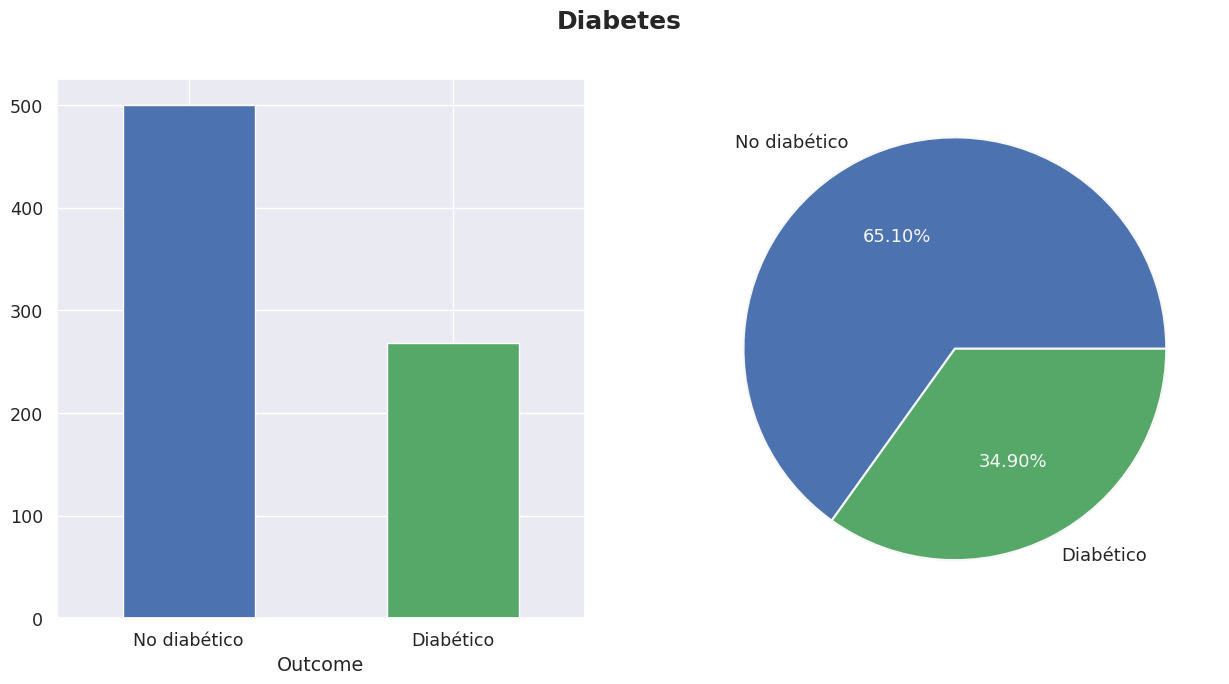

In [31]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes", fontsize = 18., fontweight="bold")
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No diabético", "Diabético"])
_ = data.Outcome.value_counts().plot.pie(labels = ("No diabético", "Diabético"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

## Distribución


****
**EJERCICIO:** a partir de los siguientes gráficos, ¿qué puedes comentar del tipo de distribución de los datos?
****

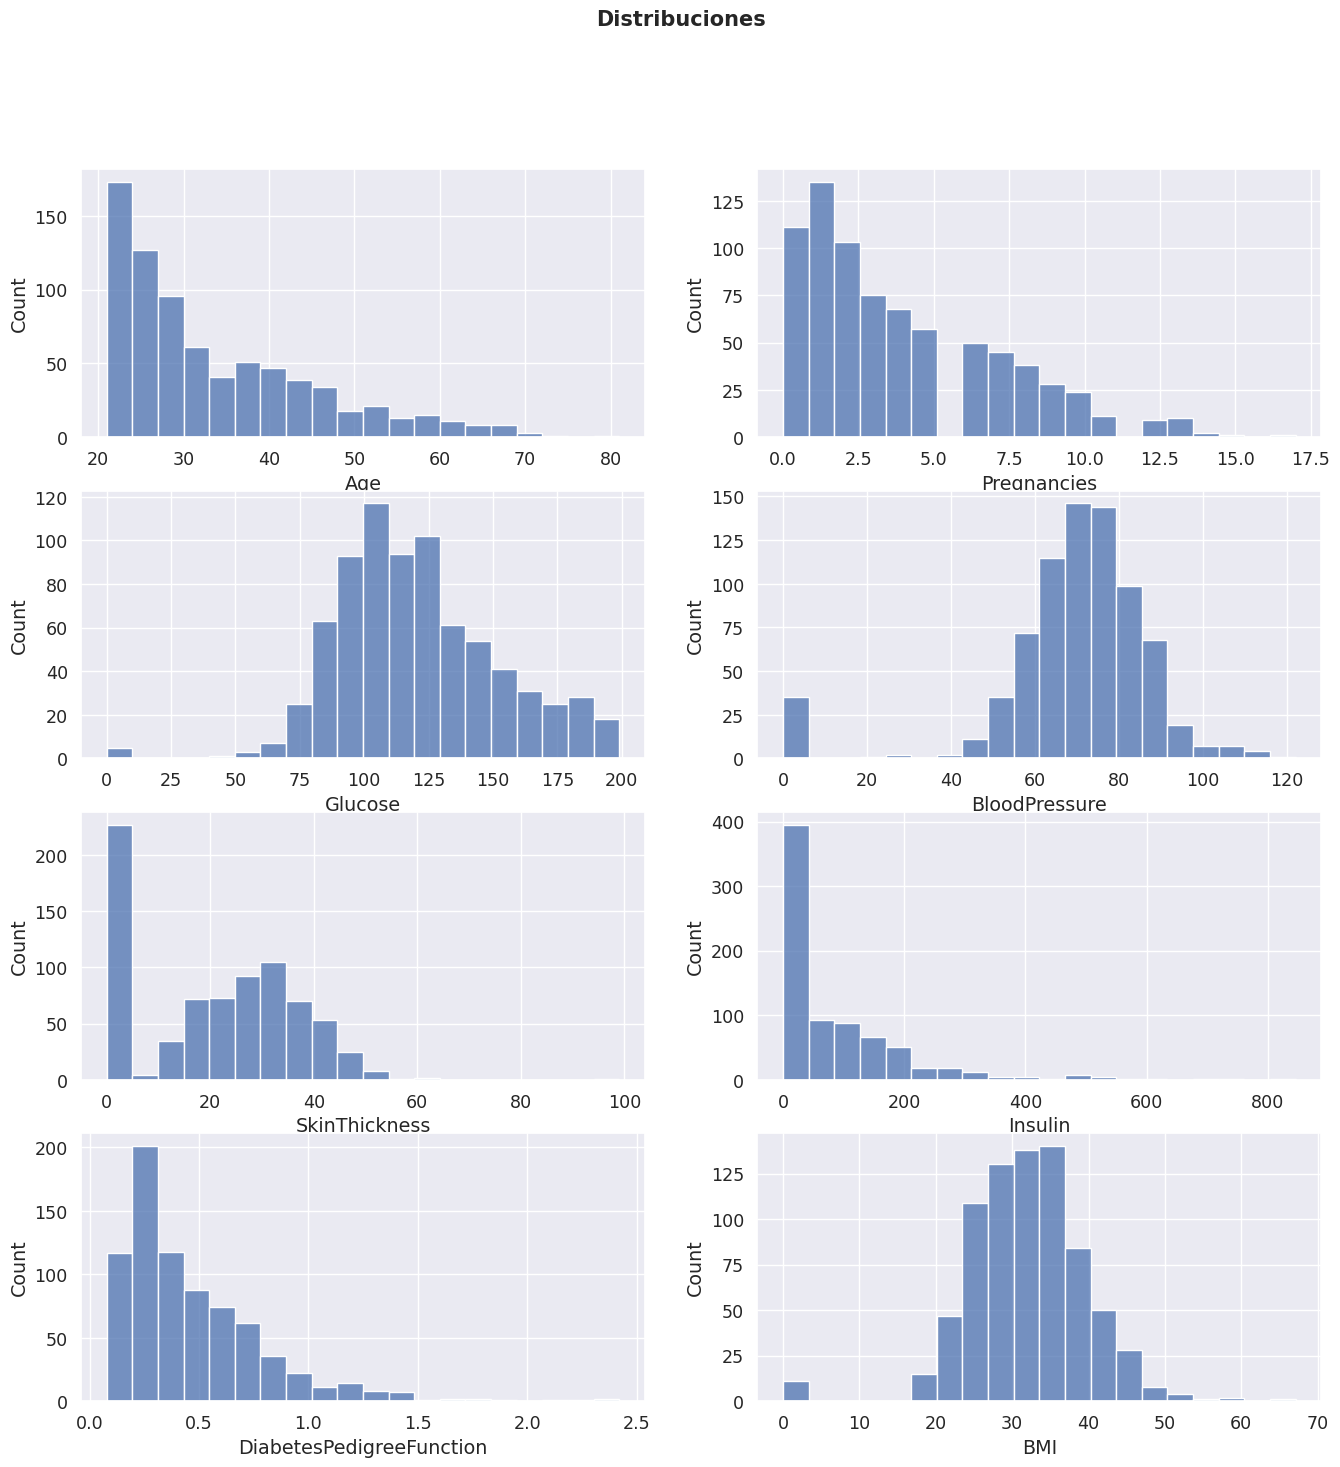

In [32]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(data.Age, bins = 20, ax=ax[0,0])
sns.histplot(data.Pregnancies, bins = 20, ax=ax[0,1])
sns.histplot(data.Glucose, bins = 20, ax=ax[1,0])
sns.histplot(data.BloodPressure, bins = 20, ax=ax[1,1])
sns.histplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(data.BMI, bins = 20, ax=ax[3,1])
plt.suptitle("Distribuciones", fontsize=15, fontweight="bold");

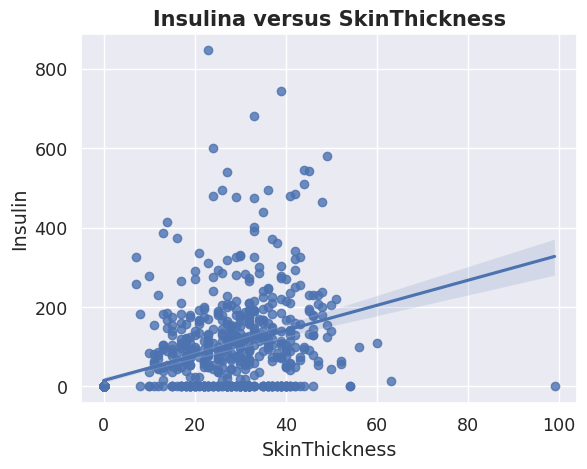

In [33]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=data)
plt.title("Insulina versus SkinThickness", fontsize=15, fontweight="bold");

## Correlación



****
**EJERCICIO:** a partir de los siguientes gráficos, ¿qué puedes comentar de la correlación entre variables?.
****

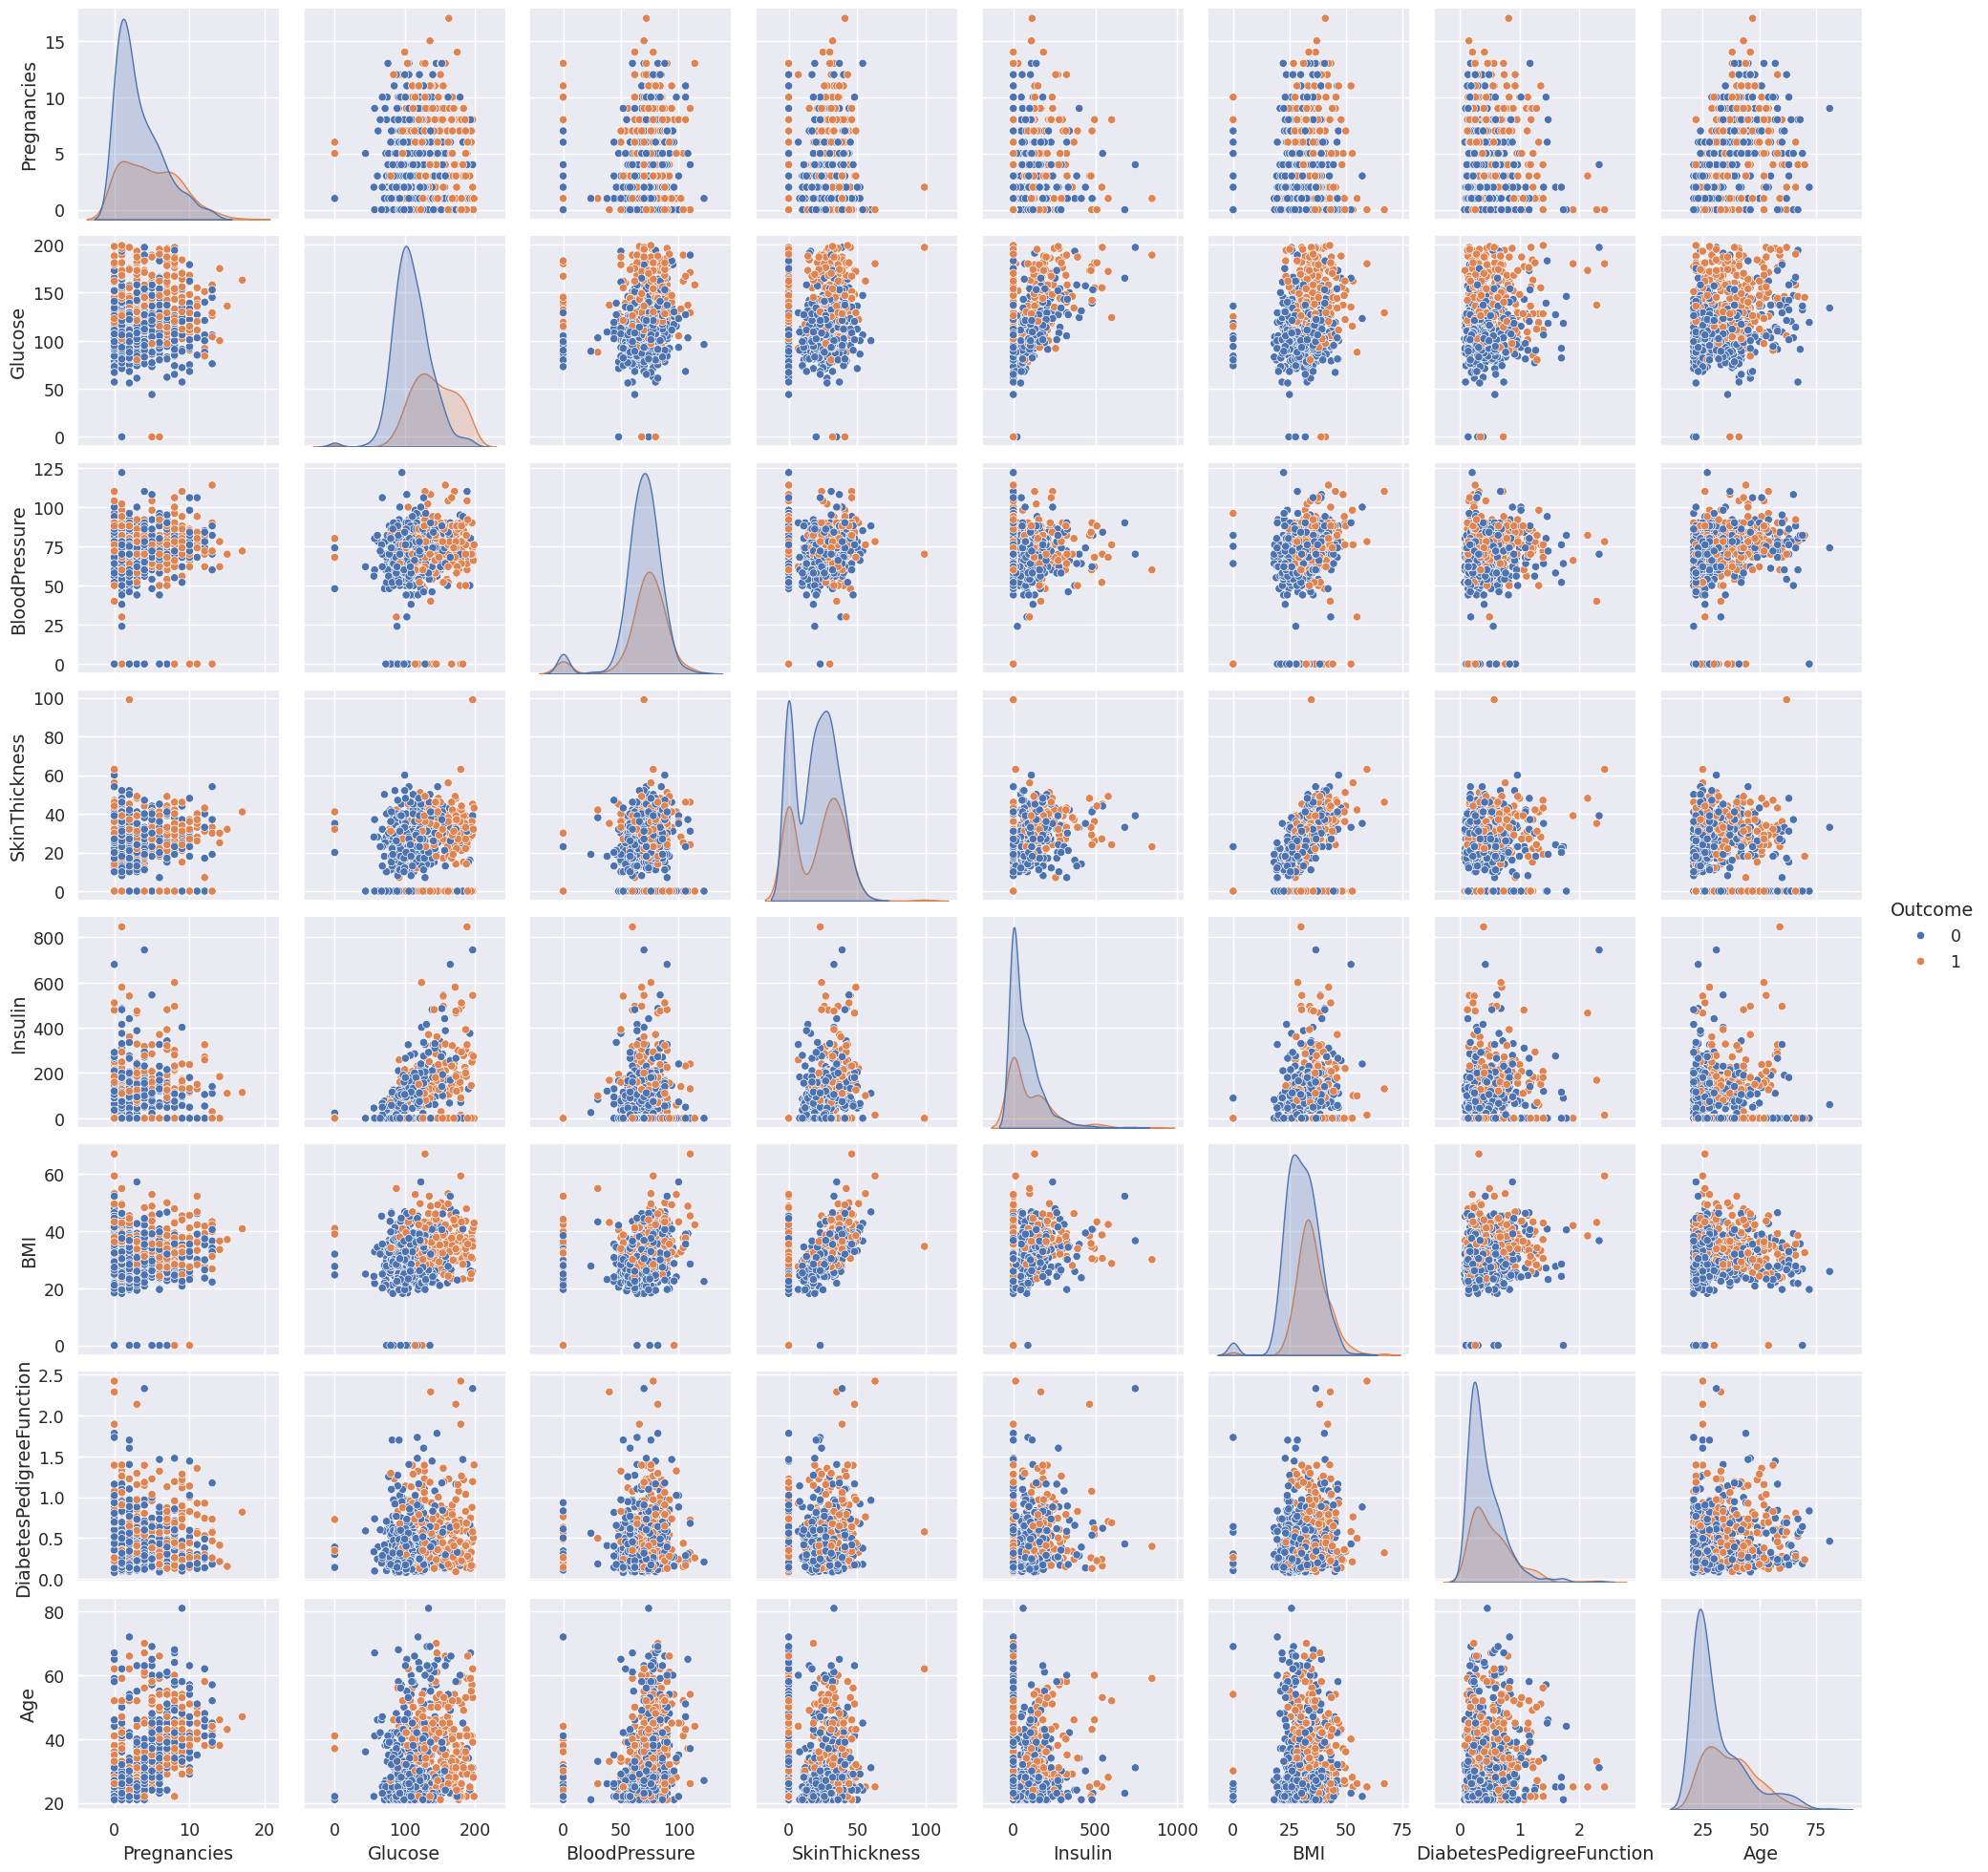

In [34]:
sns.pairplot(data=data,hue='Outcome');

## Gráficos de Violín



****
**EJERCICIO:** comenta los siguientes gráficos ¿qué muestran? ¿puedes identificar medidas de tendencia central?.
****

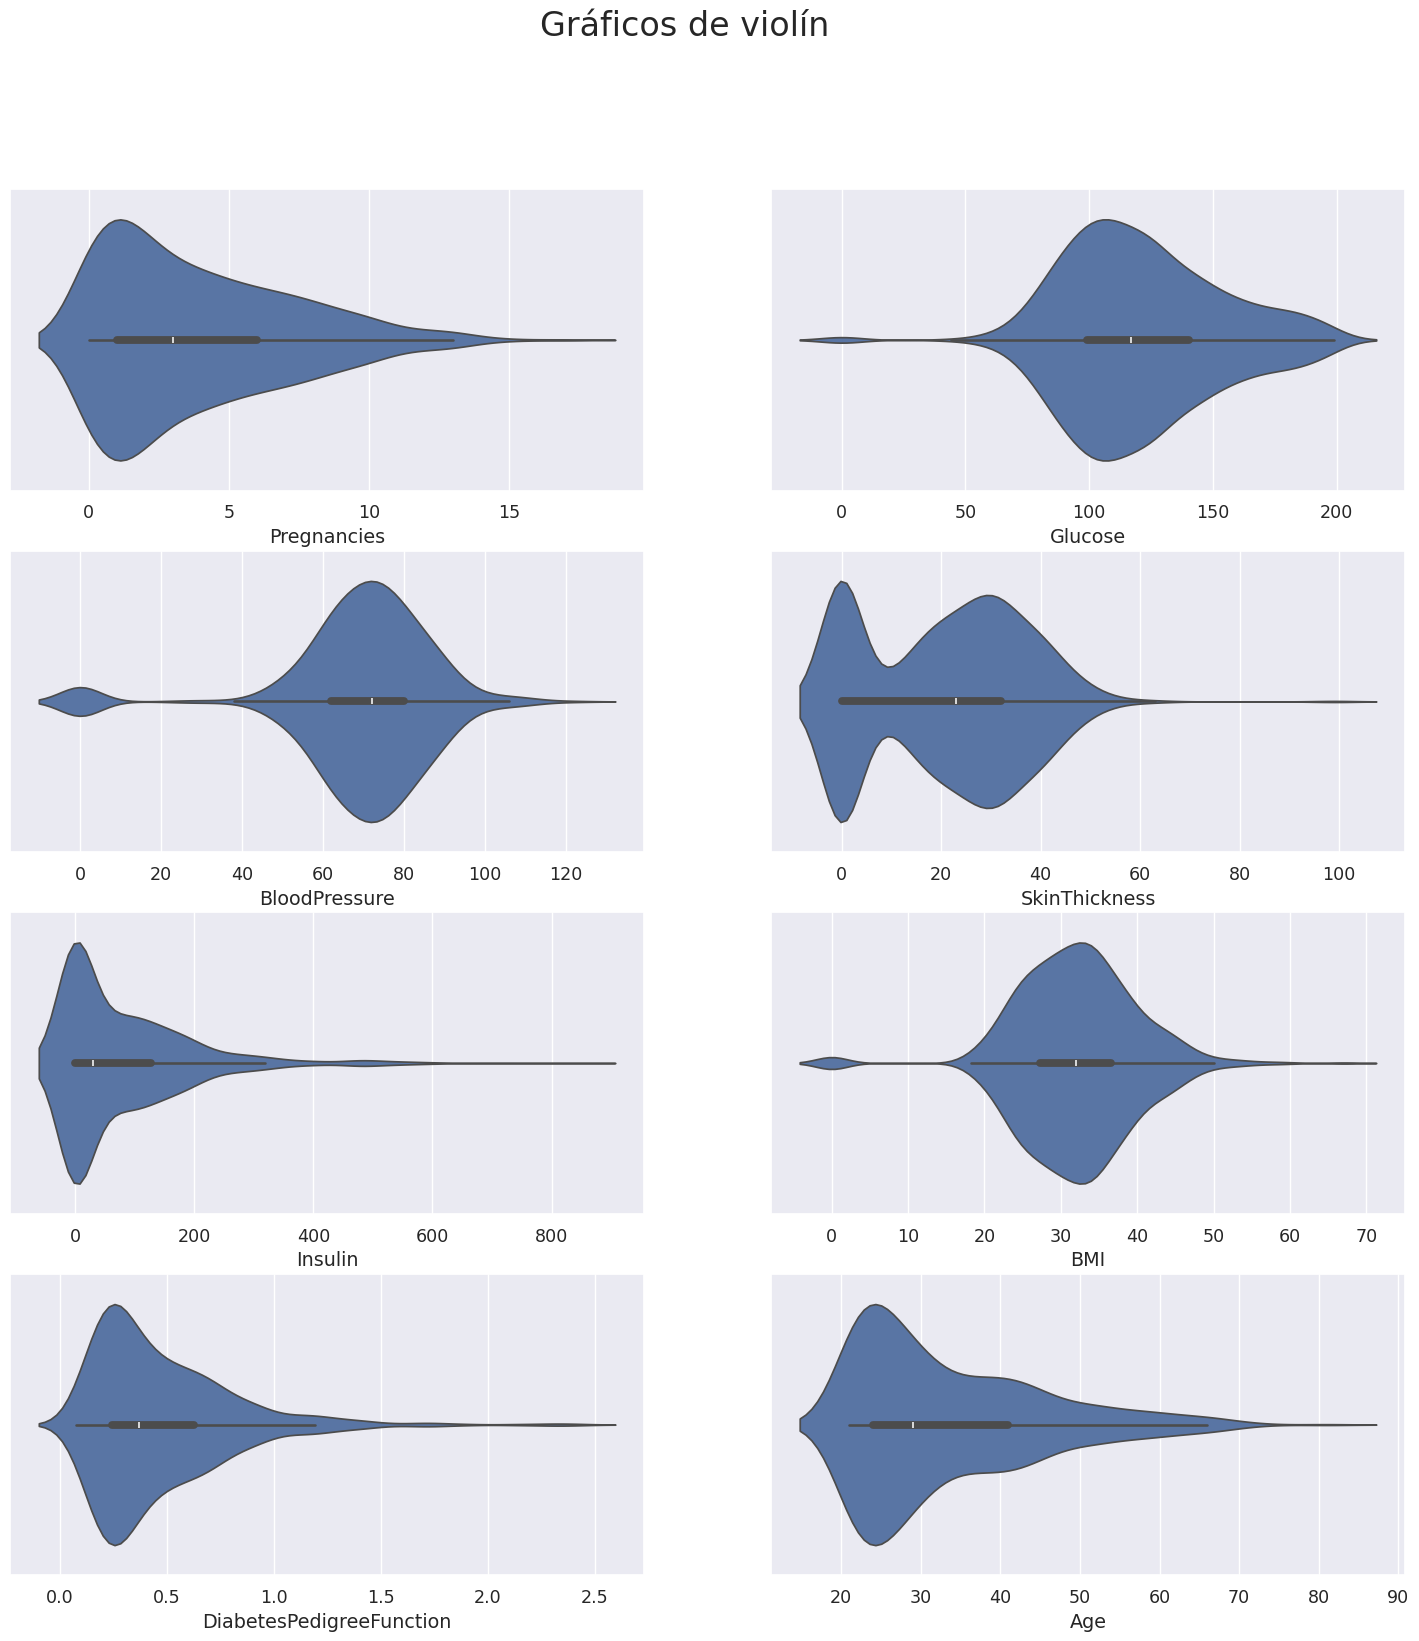

In [35]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Gráficos de violín',fontsize=24)
sns.violinplot(x="Pregnancies", data=data,ax=ax[0,0])
sns.violinplot(x="Glucose", data=data,ax=ax[0,1])
sns.violinplot (x ='BloodPressure', data=data, ax=ax[1,0])
sns.violinplot(x='SkinThickness', data=data, ax=ax[1,1])
sns.violinplot(x='Insulin', data=data, ax=ax[2,0])
sns.violinplot(x='BMI', data=data, ax=ax[2,1])
sns.violinplot(x='DiabetesPedigreeFunction', data=data, ax=ax[3,0])
sns.violinplot(x='Age', data=data, ax=ax[3,1])
plt.show()


## Correlación entre características

****
**EJERCICIO:** comenta el siguiente mapa ¿qué correlaciones positivas existen? ¿cuáles son negativas?.
****

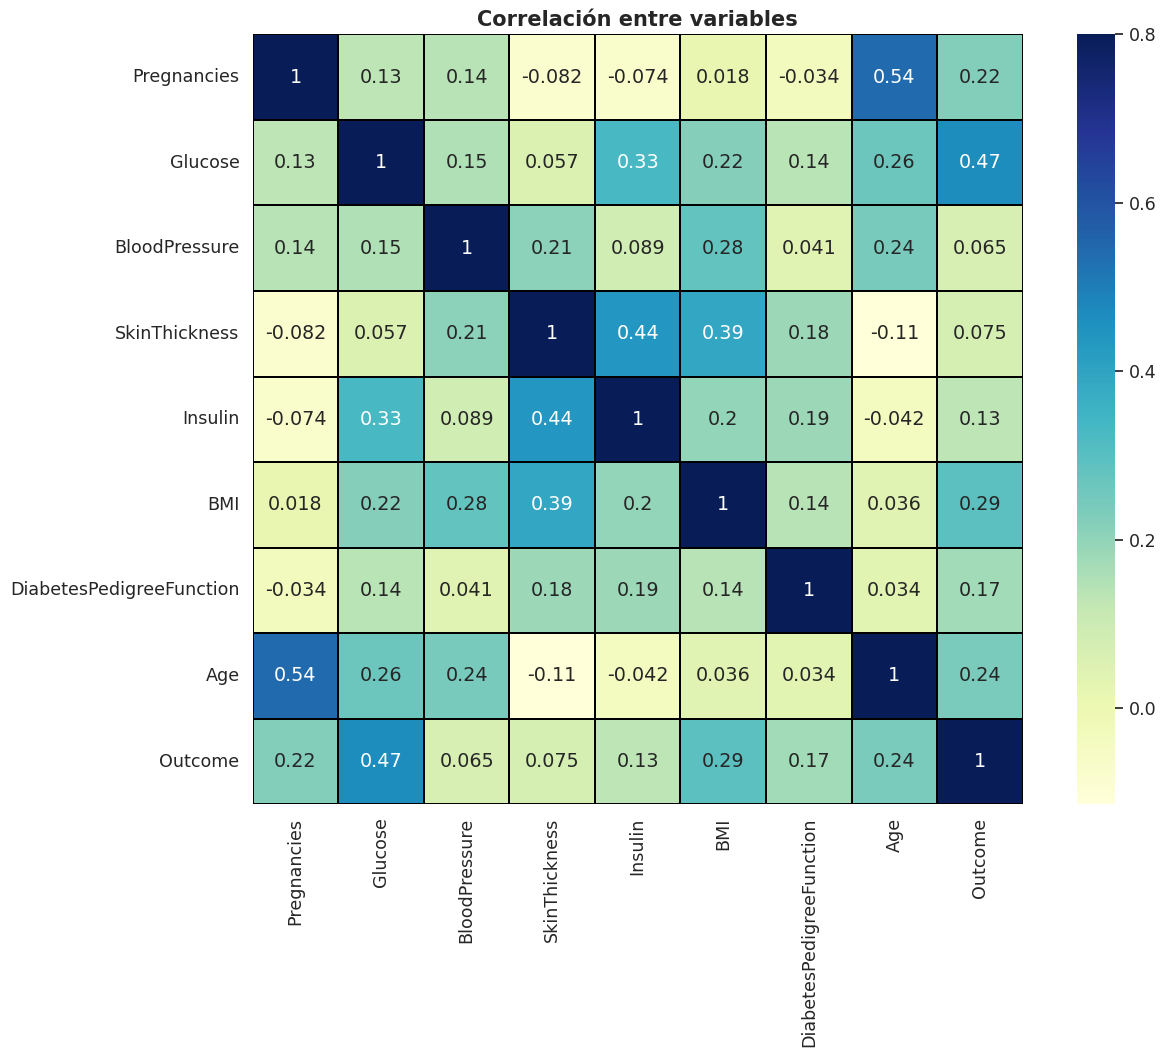

In [36]:
correlacion=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(correlacion, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlación entre variables', fontsize=15, fontweight="bold");

# Modelo predictivo

In [37]:
# Variables independientes
X = data.iloc[:, :-1]
# Variable dependiente
y = data.iloc[:, -1]

# Separación de conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29, stratify=y)

## Logistic Regression



****
**EJERCICIO:** identifica las etiquetas o clases que serán predichas por el modelo.
****

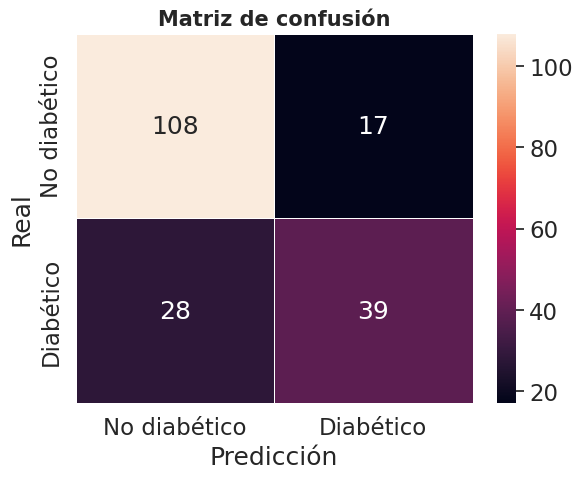



Accuracy  76.5625


In [38]:
# Creación del modelo
modelo_lr = LogisticRegression(solver="lbfgs", max_iter=1000)

# Entrenamiento del modelo
modelo_lr.fit(X_train, y_train)

# Predicción
y_pred = modelo_lr.predict(X_test)

# Gráfica de la matriz de confusión
clases = ["No diabético","Diabético"]
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', linewidth=.7, xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
plt.xlabel("Predicción"); plt.ylabel("Real")
plt.show()
# Accuracy
print("\n\nAccuracy ", modelo_lr.score(X_test, y_test)*100)

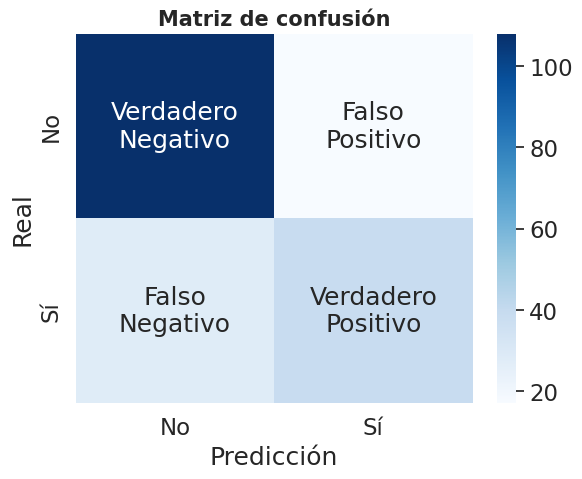

In [39]:
labels = ['Verdadero\nNegativo','Falso\nPositivo','Falso\nNegativo','Verdadero\nPositivo']
labels = np.asarray(labels).reshape(2,2)
clases = ["No","Sí"]
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
plt.xlabel("Predicción"); plt.ylabel("Real");

****
**EJERCICIO:** comenta si este es un buen modelo, justifica. ¿Cómo está el balance de clases? ¿afecta al modelo?
****